# Modeling

In general, we can define a model as **a simplified version of something else**. Good models omit unimportant details, given some context.

Machine Learning and Data Science are subfields of "[Artificial Intelligence](https://en.wikipedia.org/wiki/Artificial_intelligence)" in which **we are concerned with computational models using data.** In other words, we want models which artificially *learn* from data. We call this artificial learning "machine learning". In these cases, sometimes "model" and "algorithm" are use interchangeably.

There are a vast number of machine learning models, but we can categorize all of these models as one of the following types:

- Supervised Learning *(this lesson)*
- Unsupervised Learning
- Semi-Supervised/Self-Supervised Learning

*Note: Optimization (especially the optimization of the models listed above) is also a kind of "modeling" which we'll touch on more later.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

## Train-Test Split

**Machine learning models are expected to generalize to "unseen" data**. This means that no matter how much information we have when building our model, we will never know all the situations the model will encounter. So, from the very beginning, we need to consider how well our model will generalize to new data.

To simulate this bout with the unknown, **machine learning models are built using *only* a subset of the data available**. We call this subset the "training" or "train" set of data, and the set that is left out is called the "test" set or the "hold out" set.

- **Train Data:** used to explore the data, decide on model options, *train* models, try out new ideas, etc.
- **Test ("Hold Out") Data:** used to *test* out the the final model candidates to make a selection.
- *"Validation Data" is a subset of the training data which can be excluded from model fits to simulate results one might see in the test data.*


Note: **the test data is *only* used to make the final model selection**, and it should be *held out* until the final model is selected. Then, the model is re-trained on all the data available before it is deployed.

In [2]:
from sklearn.model_selection import train_test_split

# Supervised Learning

When we learn, we process past experience and update a model such that the the model is more useful for future experience. In supervised learning, we can define a model $f$ as:

$$
\hat{y}_i = f_\lambda(x_i; \theta_{X, y})
$$

Symbol | Description
:---: | :---
$X$ | **Features** of observed entities. These are attributes of the entities (i.e., columns of data)
$y$ | Observed **target** or **label** we'd like to model. An attribute of the observations which is *especially interesting*.
$x_i$ | Input, or a new observation
$f$ | The "true" (unknown) deterministic relationship between $X$ and $y$ (with some inherent error $\varepsilon$)
$f_\lambda$ | Some computational algorithm with hyperparameters or "settings" $\lambda$ (e.g., "linear regression"). An *estimation* of $f$.
$\hat{y}_i$ | Predicted value of $y$ for the observation $x_i$
$\hat{\theta}_{X, y}$ | Parameters for the model $f_\lambda$ which are "fit" to the data $X$ and $y$

## Using Scikit-Learn

As we've seen, [Scikit-Learn](https://scikit-learn.org/stable/index.html) is the industry standard data science toolkit, and it's modules are used in almost every aspect of data science. With supervised learning, the *basic* steps for modeling are (after collecting our data):

1. **Explore and clean data**, and define features and target. These are *raw* observations "as they come".
    - This includes pandas manipulation and data cleaning.
    - Exploration will inform what comes.
    - *Use plots often!*
2. **Preprocess** data, and prepare $X$ and $y$ for modeling.
    - Many preprocessing tools in Scikit-Learn use the `sklearn.preprocessing` module.
    - Recall that in Scikit-Learn, most of these steps involve `.transform()` or `.fit_transform()` methods.
3. **Define a model**, $f_\lambda$ with hyperparameters $\lambda$
    - E.g., `model = DecisionTree(max_depth=4)` could be a decision tree with maximum depth 4.
4. **Fit the model** to the data, determining parameters $\hat{\theta}_{X, y}$.
    - E.g., `model.fit(X, y)`
5. **Predict** values $y_i$ for data $x_i$
    - E.g., `y_pred = model.predict(X)`.
6. **Evaluate** the model
    - Most models have a `model.score(X, y)` method, with a default evaluation metric. But, the `sklearn.metrics` module provides more options.
    - It's a good practice to *compare all models to a simple baseline model* as a benchmark reference.
     - *Use plots often!*
7. **REVISIT AND REPEAT STEPS AS NEEDED**. Of course, modeling is iterative, so you may revisit and repeat steps based on what's needed.
    - E.g., moving between steps 2 and 4 is expected, and step 1 is almost always revisited.

*Note: As models become more and more complex, it is advised that users of Scikit-Learn use [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) to keep their work as generalizable and reusable as possible (with a few [examples](https://scikit-learn.org/stable/modules/compose.html)).*

## Types of Supervised Learning

There are two varieties of supervised learning:

- **Regression:** target values are ordinal (can be assigned numbers with an order)
- **Classification:** target values are nominal (categorical, without a meaningful order)



For example, given data on diamonds, the question becomes what might be most interesting to us? I.e., what would make a good target?

- In the case of regression, *price* seems like a good candidate for a target to model
- For classification, we might be interested in the *cut* (or, how "good" the diamond is)

## Regression

With regression, the target is numeric and ordinal. Two of the most fundamental regression models are: linear regression and the decision tree regressor.

To illustrate regression, we will be using the [diamonds](dataset). Before we begin, we will define our hold out (or "test") set. A good rule of thumb is to hold out about 20% of the data, and use the remaining 80% for modeling. With larger datasets, you can reduce the test size, and with smaller datasets, you'll likely want to increase the test size slightly.

As a very basic measure for error, we'll use **mean absolute error** which is the average distance between each prediction and its corresponding actual value.

In [3]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.shape

(53940, 10)

In [4]:
# randomly hold out 20% of the data (rs=42 for educational purposes)
df_train, df_test = train_test_split(df_diamonds, test_size=0.2, random_state=42)

In [5]:
# df_test.to_csv('./data/holdout_set.csv')

**<span style='color: darkred'>Now, we only use `df_train` until we are ready to compare final models.</span>**

### Linear Regression

In Linear Regression, the traditional model "learns" a set of parameters, $\hat{\beta}$ for $k$ different coefficients of some observation $x$, where $\hat{\beta}_0$ represents the "y-intercept"

$$
\hat{\beta} = 
\begin{bmatrix}
    \hat{\beta}_0 \newline
    \hat{\beta}_1 \newline
    \vdots \newline
    \hat{\beta}_k \newline
\end{bmatrix}, \quad x = 
\begin{bmatrix}
    1 \newline
    x_1 \newline
    \vdots \newline
    x_k \newline
\end{bmatrix}
$$

These are combined using the formula

$$
\begin{align}
    \hat{y} &= \hat{\beta}^Tx \newline
            &= \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2 + \dots + \hat{\beta}_{k-1}x_{k-1} + \hat{\beta}_kx_k
\end{align}
$$

In this way, linear regression models the *linear relationships* between each features $x_i$ and the target $y$, using the parameter $\hat{\beta}_i$.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [7]:
from sklearn.datasets import make_regression

def simple_regression_plot(model):
    '''
    Plot example of regression model on constructed data with a single feature.
    '''
    X, y = make_regression(n_features = 1, noise = 12, random_state = 15)
    
    # fit the model *in place*
    model.fit(X, y)
    y_preds = model.predict(X)
    
    sns.scatterplot(x = X.reshape(-1), y = y, label = 'training data')
    sns.lineplot(x = X.reshape(-1), y = y_preds, label = 'predictions', color = 'orange')
    sns.scatterplot(x = X.reshape(-1), y = y_preds, marker='|')

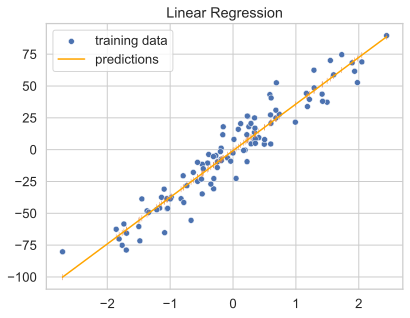

In [8]:
simple_regression_plot(LinearRegression())
plt.title('Linear Regression');

#### Assumptions and Requirements

- The linear model assumes *linear* relationships between each feature and the target.
- This model works best when the target variable is [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution).
- **All values must be numeric and ordinal**.

#### Baseline Model

In [9]:
df_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
26546,2.01,Good,F,SI2,58.1,64.0,16231,8.23,8.19,4.77
9159,1.01,Very Good,E,SI2,60.0,60.0,4540,6.57,6.49,3.92
14131,1.10,Premium,H,VS2,62.5,58.0,5729,6.59,6.54,4.10
15757,1.50,Good,E,SI2,61.5,65.0,6300,7.21,7.17,4.42
24632,1.52,Very Good,G,VS1,62.1,57.0,12968,7.27,7.32,4.53


In [10]:
# only numeric features
features = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [11]:
X = df_train[features]
y = df_train['price']

<span style='color:darkblue'>Notice how none of these features "contain" information about the price of the diamond. Here, we **avoid target leakage**. Target leakage is when we build a supervised learning model with features that are dependent on the target value. For example, if there were a column called "sales_tax", we would have a feature that *depends* on the target value (i.e., $ in tax is just a percentage of the price).</span>

In [12]:
lm_0 = LinearRegression()
lm_0.fit(X, y)

LinearRegression()

In [13]:
y_pred = lm_0.predict(X)

In [14]:
mean_absolute_error(y, y_pred)

891.8081818769631

On average, this model is off by about $890.

#### Poisson Regression

Let's investigate the assumptions for this model.

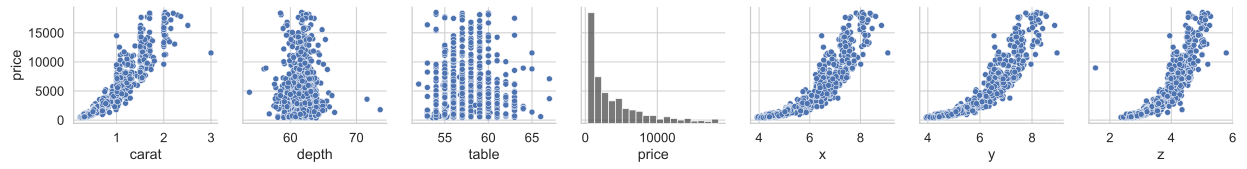

In [15]:
# checking for linear relationships
g = sns.PairGrid(df_train.sample(1000), y_vars=['price'])
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot);

- Most of these relationship with `price` look to be exponential, meaning that they have a *power*-based relationship with the target
- The distribution of "price" is not normally distributed, in fact it looks closer to a [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution). This is common with count data like "price".


In general, we could adjust for the power relationship by [transforming the target variable](https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression) using a [power transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer). But, in this case, since we recognize that price is count data, we can adjust for both issues using a version of linear regression called [Poisson Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html). This makes the necessary transformation to the target, and takes into account its distribution.

**Note: Poisson Regression requires the target values `y >= 0`.**

In [16]:
from sklearn.linear_model import PoissonRegressor

In [17]:
X = df_train[features]
y = df_train['price']

In [18]:
lm_1 = PoissonRegressor(max_iter=500)
lm_1.fit(X, y)

PoissonRegressor(max_iter=500)

In [19]:
y_pred = lm_1.predict(X)

In [20]:
mean_absolute_error(y, y_pred)

847.2305036696456

This model is an improvement. On average, the model is off by about $847.

*Note: Price estimation models are notoriously difficult!*

#### Dummy Variables

Since the linear model requires linear relationships, for us to include categorical columns, we need to convert them to **dummy columns** of 1s and 0s, where each category-value has its own binary column. The pandas `pd.get_dummies` function will do all this only for categorical columns.

Given any column, collecting all the dummy values (each binary columns) is equivalent to all-but-one. So, we use `drop_first`. *Why?*

In [21]:
# all features (not price, of course)
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [22]:
df = pd.get_dummies(df_train[features], drop_first=True, dtype=int)
df.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1'],
      dtype='object')

In [23]:
pd.concat((df_train['cut'], df[[c for c in df if 'cut_' in c]]), axis=1).sample(5)

,cut,cut_Premium,cut_Very Good,cut_Good,cut_Fair
4299,Ideal,0,0,0,0
13343,Good,0,0,1,0
42533,Ideal,0,0,0,0
34020,Ideal,0,0,0,0
26227,Premium,1,0,0,0


In [24]:
X = pd.get_dummies(df_train[features], drop_first=True, dtype=int)
y = df_train['price']

In [25]:
# this solver is a bit better for "wide" data like ours
lm_2 = PoissonRegressor(max_iter=1000, solver='newton-cholesky')
lm_2.fit(X, y)

PoissonRegressor(max_iter=1000, solver='newton-cholesky')

In [26]:
y_pred = lm_2.predict(X)

In [27]:
mean_absolute_error(y, y_pred)

440.7643981320901

This is a better improvement on the last model with average error of about $440.

### Decision Tree Regressor

Another interesting regression model is the [Decision Tree Regressor](https://scikit-learn.org/stable/modules/tree.html#tree). This model uses breaks on a decision tree to determine what values to predict.

With decision trees, you can map each prediction to a "path" along a decision tree. For example:

    IF `cut == "Good"`
        AND `carat == 2.4`
        AND `y < 4.5`
    THEN
        price -> mean(1432, 58372, 1523) = 20442.3
        
Typically, the result is the average value of the "seen" prices in each [optimal](https://scikit-learn.org/stable/modules/tree.html#classification-criteria) partion.

In [28]:
from sklearn.tree import DecisionTreeRegressor

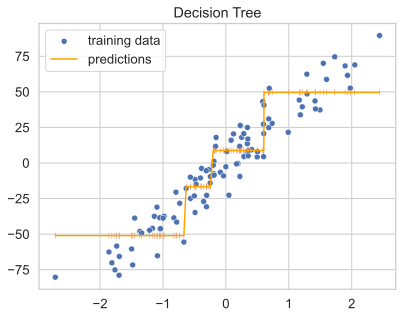

In [29]:
dt = DecisionTreeRegressor(max_depth = 2)

simple_regression_plot(dt)
plt.title('Decision Tree');

#### Assumptions and Requirements

- The decision tree can take in categorical features
- sklearn requires all numeric values (i.e., numeric labels)
- This model will extrapolate the same prediction for all feature values below their minimum or above their maximum.

In [30]:
# example of extrapolation
dt.predict([[-20]]), dt.predict([[50]])

(array([-51.01285175]), array([49.56447075]))

#### Baseline Model

Since the decision tree requires numerical data, let's start with only those columns again.

In [31]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [32]:
X = df_train[features]
y = df_train['price']

In [33]:
dt_0 = DecisionTreeRegressor()
dt_0.fit(X, y)

DecisionTreeRegressor()

In [34]:
y_pred = dt_0.predict(X)

In [35]:
mean_absolute_error(y, y_pred)

18.492533370411568

We can already see how powerful this model can be ...

#### Categorical Columns

To incorporate categorical values, we can use the same dummies method from above.

In [36]:
# all features (not price, of course)
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [37]:
X = pd.get_dummies(df_train[features], drop_first=True, dtype=int)
y = df_train['price']

In [38]:
# this solver is a bit better for "wide" data like ours
dt_1 = DecisionTreeRegressor()
dt_1.fit(X, y)

DecisionTreeRegressor()

In [39]:
y_pred = dt_1.predict(X)

In [40]:
mean_absolute_error(y, y_pred)

0.49339543937708563

This model is almost perfect ... but this does not mean it will perform the best on the test set.

### Evaluation

We can evaluate these models on the `df_test` set of data now. With regression models, we have a few different ways to measure model performance, and to compare one model with the next:

- (Adjusted) $R^2$ Coefficient
- Error Metrics
- Plots

In [41]:
# baseline decision tree and linear, and poisson linear
features_dt_lm = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [42]:
# dummy variable poisson and decision tree
features_dummy = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

#### (Adjusted) R-Squared

The typical scoring metric for regression is the $R^2$ score, or the Coefficient of Determination. It is calculated by:

$$
R^2 = 
1 - \frac{\sum_i(y_i - \hat{y}_i)^2}{\sum_i(y_i - \bar{y})^2} = 
1 - \frac{\text{sum of squared errors}}{\text{sum of squares total}} =
\frac{\text{explained variance}}{\text{total variance}}
$$

We can think of this in a few ways:

- It is the square of Pearson's correlation coefficient (see above) between the actual values $y$ and the predicted values $\hat{y}$
- This represents the percentage of the variance in our target variable $y$ "explained" by (influencing results of) our regression model.
- If $R^2$ is 1, all our *training data* would lie on the line. In this way, we would perfectly capture all of the variation/information in $y$ (given our data).
- Every observed $y$ deviates from the mean by some amount (nature). On average, our model will account for $R^2$% of that deviation.

The **adjusted** $R^2$ value is calculated by dividing both the numerator and denominator of the subtracted term by degrees of freedom, to keep the calculation from inflating as more features are added.

$$
R^2_{adj} = 1 - \frac{(\sum_i(y_i - \hat{y}_i)^2)\div(n-p)}{(\sum_i(y_i - \bar{y})^2)\div(n-1)} = 1 - (1 - R^2)\cdot {(n-1)\over(n-p)}
$$

**r-squared should only be used to *compare* models. Not evaluate a single model.**

For example, we'll just compare the linear models.

In [43]:
from sklearn.metrics import r2_score

In [44]:
X = df_test[features_dt_lm]
y = df_test['price']

In [45]:
lm_0.score(X, y)

0.8589542625888935

In [46]:
y_pred = lm_0.predict(X)
r2_score(y, y_pred)

0.8589542625888935

In [47]:
lm_1.score(X, y)

0.9099065656620334

In [48]:
X = pd.get_dummies(df_test[features_dummy], drop_first=True, dtype=int)
y = df_test['price']

In [49]:
lm_2.score(X, y)

0.973381647893856

Based only on the $R^2$ values, we might like to choose the second (Poisson) linear model, over the other linear models.

#### Error Metrics

**Error metrics estimate how well a model will perform on unseen data.** We've already seen one helpful error metric, the mean absolute error, representing the average absolute value of the difference between each actual target value and the prediction. Some other helpful ones include:

**Mean Absolute Percent Error (MAPE):** This is the average *percent* difference between predictions and actual values. This is typically a good measure for values which have a very wide range (e.g., income levels, product prices, etc.) where error values should be treated *proportionally* to the size of the target value itself.

$$
\text{MAPE}={\frac {1}{n}}\sum _{i=1}^{n}\left|{\frac {\hat{y}_i - y_i}{y_i}}\right|
$$

**Root Mean Squared Error (RMSE):** If we create a square for each error value (with length/width $e_i$), and then calculate the average of all those squares, this value is the width/length of that average square. It is in the units of the target value, but it is difficult to interpret. *Note: This metric is sensitive to outliers and punishes large errors far more than small errors.**

$$
\text{RMSE} = \sqrt{\frac{\sum_{i=1}^n (\hat{y}_i - y_i)^2}{n}}
$$

**Median Absolute Error (MdAE):** Unlike the MAE which is sensitive to outliers and large errors, this value gives an unbiased partition of errors where 50% of the predictions have an error less than this.

$$
\text{MdAE} = \text{median}(|\hat{y}_2 - y_1|, |\hat{y}_2 - y_2|, \dots, |\hat{y}_n - y_n|)
$$

We'll illustrate these just using the two decision tree models which were fit.

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, median_absolute_error

In [51]:
X = df_test[features_dt_lm]
y = df_test['price']

In [52]:
y_pred = dt_0.predict(X)
print('mape: ', round(mean_absolute_percentage_error(y, y_pred), 3))
print('rmse:  ', round(np.sqrt(mean_squared_error(y, y_pred)), 3))
print('mdae:  ', round(np.sqrt(median_absolute_error(y, y_pred)), 3))

mape:  0.267
rmse:   1861.378
mdae:   19.602


In [53]:
X = pd.get_dummies(df_test[features_dummy], drop_first=True, dtype=int)
y = df_test['price']

In [54]:
y_pred = dt_1.predict(X)
print('mape: ', round(mean_absolute_percentage_error(y, y_pred), 3))
print('rmse:  ', round(np.sqrt(mean_squared_error(y, y_pred)), 3))
print('mdae:  ', round(np.sqrt(median_absolute_error(y, y_pred)), 3))

mape:  0.089
rmse:   751.522
mdae:   11.533


#### Plots

Easily the best way to evaluate a regression model is to use plots. One common one is the residual plot, evaluating residual values for each predicted value.

In [55]:
def resid_plot(y_true, y_pred, sample_n=None, ax=None):
    df = pd.DataFrame({'Predicted Target': y_pred,
                       'Residual': y_pred - y_true})
    
    # sample of residuals for large datasets
    if sample_n is not None:
        df = df.sample(n = sample_n)
        
    g = sns.regplot(data=df, ax=ax,
                    x='Predicted Target', 
                    y='Residual', lowess=True,
                    line_kws={'color': 'darkorange'}, scatter_kws={'s': 5})

    g.axhline(y=0, color='gray', linestyle='--')
    
    return g

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

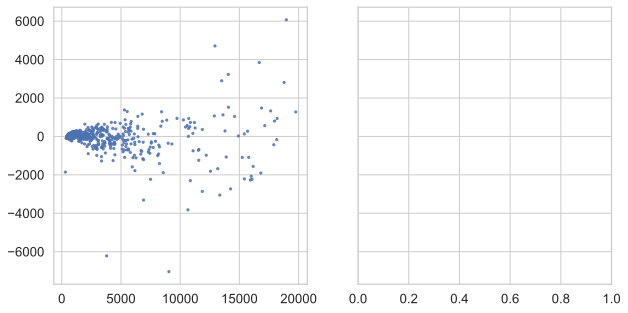

In [56]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

# Dummy variable data
X = pd.get_dummies(df_test[features_dummy], drop_first=True, dtype=int)
y = df_test['price']

# Poisson model
y_pred = lm_2.predict(X)
g = resid_plot(y, y_pred, 500, ax=axes[0])
g.set_title('Poisson Model')

# Decision Tree Model
y_pred = dt_1.predict(X)
g = resid_plot(y, y_pred, 500, ax=axes[1])
g.set_title('Decision Tree Model');

Both of these models have trouble with higher prices, but that's to be expected given the low frequency of that data in proportion to the rest of the smaller priced data.

## Classification

With classification, the target is categorical. Similar to regression, two fundamental classification models are: logistic regression and the decision tree classifier.

To illustrate classification, we will be using the [digits](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits) dataset. Again, we will hold out 20% of the data for testing, and use the remaining 80% for modeling.

As a very basic measure for error, we'll use **accuracy** which is the proportion of all predictions that are correct.

In [57]:
from sklearn.datasets import load_digits

In [58]:
digits_data = load_digits(as_frame=True)

In [59]:
df_digits = digits_data['data']
df_digits['digit'] = digits_data['target']

In [60]:
# randomly hold out 20% of the data (rs=42 for educational purposes)
df_train, df_test = train_test_split(df_digits, test_size=0.2, random_state=42)

In [61]:
def show_digits(digits_data, n=4):
    n = min(10, n)  # Set a maximum number to plot at 10
    
    images_and_labels = list(zip(digits_data.images, digits_data.target))
    
    for index, (image, label) in enumerate(images_and_labels[:n]):
        plt.subplot(2, 5, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %i' % label)
    
    plt.show()

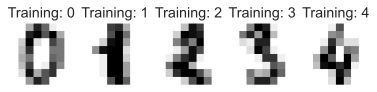

In [62]:
show_digits(digits_data, 5)

In [63]:
df_train.shape

(1437, 65)

In [64]:
df_train.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'digit'],
      dtype='object')

### Logistic Regression

**Logistic Regression is a form of linear regression** where the target values (1s and 0s) are modeled by the sigmoid function $\sigma(z) = \hat{p}_i$, resulting in an estimated probability $\hat{p}_i = P(y_i = 1)$. Here, $z$ refers to the same equation for a linear model with $k$ features:

$$
z = \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2 + \dots + \hat{\beta}_kx_k
$$

With logistic regression, we create a **probabilistic or soft classifier** using $\hat{p}_i = \sigma (z) = \frac{1}{1+e^{-z}}$. That is:

$$
\hat{p} = \sigma (z) = \frac{1}{1+e^{-(\hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2 + \dots + \hat{\beta}_kx_k)}}
$$

Conveniently, the inverse of this function is the "log-odds"

$$
\log\left(\frac{\hat{p}}{1-\hat{p}}\right) = z = \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2 + \dots + \hat{\beta}_kx_k
$$

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay

def simple_classification_plot(model, noise=0.01, class_sep=0.4):

    X, y = make_classification(n_features=2, n_redundant=0,
                               class_sep = class_sep, flip_y=noise,
                               n_classes=2, random_state=42)

    # fit the model *in place*
    model.fit(X, y)
    y_preds = model.predict(X)

    df = pd.DataFrame(X, columns = ['x_1', 'x_2'])
    df['y'] = y

    _, ax = plt.subplots()

    DecisionBoundaryDisplay.from_estimator(model, X, ax=ax, alpha=0.8,
                                           response_method="predict")
    
    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=ax)

    return ax

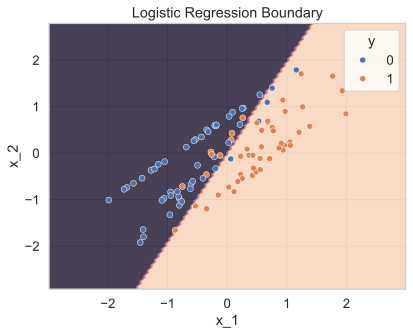

In [67]:
lr = LogisticRegression()

ax = simple_classification_plot(lr)
ax.set_title('Logistic Regression Boundary');

#### Assumptions and Requirements

- **By default, the target is expected to be binary.** This can be expanded to multiple classes with the `multi_class` argument.
- **All features must be numeric** (just like with linear regression)
- This model assumes a linear (i.e., consistent increase/decrease) relationship between each feature and the binary target.

#### Baseline Model

Let's model whether a digit is "curvy" or not. A (strictly) curvy digit would be 0, 3, 6, 8, 9.

In [68]:
df_train['is_curvy'] = df_train['digit'].isin([0, 3, 6, 8, 9]).astype(int)

In [69]:
df_train[['digit', 'is_curvy']].sample(5)

,digit,is_curvy
1534,9,1
302,5,0
1705,8,1
461,2,0
15,5,0


In [70]:
# only numeric features
features = [c for c in df_train if 'pixel' in c]

In [71]:
X = df_train[features]
y = df_train['is_curvy']

In [72]:
lm_0 = LogisticRegression(max_iter=500, solver='newton-cholesky')
lm_0.fit(X, y)

LogisticRegression(max_iter=500, solver='newton-cholesky')

In [73]:
y_pred = lm_0.predict(X)

In [74]:
accuracy_score(y, y_pred)

0.9338900487125957

Logistic regression is actually not bad at predicting images such as handwritten digits ...

### Decision Tree Classifier

The [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#tree-classification) is very similar in construction to the Decision Tree Regressor. The tree is "grown" by maximizing information gain at each split, or minimizing the [impurity](https://scikit-learn.org/stable/modules/tree.html#classification-criteria). This roughly equates to iteratively splitting on situations where making a prediction based on the proportion of classes (after the split) creates the highest accuracy for all classes.

    d = all data
    
    for each feature f in d:
        for each possible split point s in f:
            • check each side of the split, and
              calculate proportions of each class
                
        pick the s which minimizes "50/50"-type scenarios
    
    pick the f-s combination with the smallest "50/50"-type scenarios
    
    REPEAT until you've reached only pure leaves, or some other stopping point

Given numeric features, we can again expect a sort of "step function" decision boundary.

In [75]:
from sklearn.tree import DecisionTreeClassifier

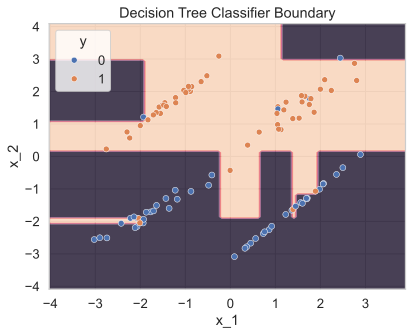

In [76]:
dt = DecisionTreeClassifier()

ax = simple_classification_plot(dt, noise=0.1, class_sep=1.5)
ax.set_title('Decision Tree Classifier Boundary');

#### Assumptions and Requirements

- This model can accept a target column with many classes
- The target column can be strings
- **All features must be numeric** (just like with the Decision Tree Regressor)

#### Baseline Model

Let's model the digits themselves.

In [77]:
# only numeric features
features = [c for c in df_train if 'pixel' in c]

In [78]:
X = df_train[features]
y = df_train['digit']

In [79]:
dt_0 = DecisionTreeClassifier()
dt_0.fit(X, y)

DecisionTreeClassifier()

In [80]:
y_pred = dt_0.predict(X)

In [81]:
accuracy_score(y, y_pred)

1.0

This model is essentially perfect.

<span style='color: darkred'>*Again, we will see that this model might not perform so well on the test set.*</span>

### Evaluation

We can evaluate these models on the `df_test` set of data now. With classification models, we have a few different ways to measure model performance, and to compare one model with the next:

- Confusion Matrix
- Error Metrics
- Plots

#### Confusion Matrix

Easily the simplest and quickest way to evaluate a classification model (on its own) is to consider its confusion matrix. Just like with the Residual Plot (and, as usual), predicted values are on the "x-axis", and actual values are reflected along "y" axis.

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
df_test['is_curvy'] = df_test['digit'].isin([0, 3, 6, 8, 9]).astype(int)

In [84]:
# only numeric features
features = [c for c in df_test if 'pixel' in c]

**Logistic Regression**

In [85]:
X = df_test[features]
y = df_test['is_curvy']

In [86]:
y_pred = lm_0.predict(X)

In [87]:
labels = sorted(np.unique(y_pred))
confusion_matrix(y, y_pred, labels=labels)

array([[174,  14],
       [ 11, 161]], dtype=int64)

In [88]:
def plot_confusion_matrix(y_true, y_pred, norm=None, ax=None):
    '''
    Plot a confusion matrix as a heatmap.
    
    `norm` : str (optional)
        Normalize along one of {'true', 'pred', 'all'}.
    '''
    
    # some standard label order for the plot
    labels = sorted(np.unique(y_pred))
        
    df_cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=labels, normalize=norm),
                         columns=labels, index=labels)
    
    if norm:
        annot_fmt = '.2g'
    else:
        annot_fmt = 'd'
        
    g = sns.heatmap(df_cm, annot=df_cm, fmt=annot_fmt, cmap="Blues", linewidths=1, ax=ax)

    g.set_xlabel("Predicted Values")
    g.set_ylabel("Actual values")
    g.set_title("")
    
    return g

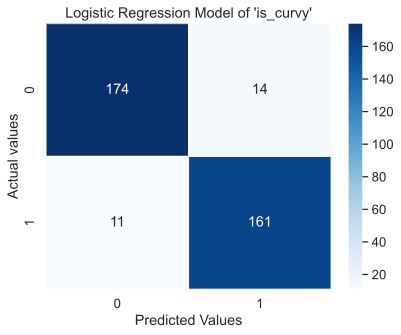

In [89]:
g = plot_confusion_matrix(y, y_pred)
g.set_title("Logistic Regression Model of 'is_curvy'");

Our logistic regression model captured most of the correct values (along the diagonal) and missed a small proportion of the others (on the off-diagonal).

**Decision Tree**

In [90]:
X = df_test[features]
y = df_test['digit']

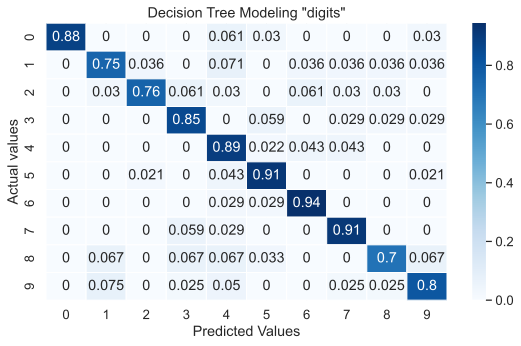

In [91]:
# Decision Tree Model
y_pred = dt_0.predict(X)

plt.figure(figsize=(9, 5))

g = plot_confusion_matrix(y, y_pred, norm='true')
g.set_title('Decision Tree Modeling "digits"');

Notice the difference between this performance, and that of the training set of data.

#### Error Metrics

First, **all classification error metrics are based on binary conditions for each class.** That is, each calculation uses 1s and 0s separately *for each class*. So, to understand a classification metric calculated for many classes, we need to understand its calculation for each single class. 

Second, all classification metrics are based on the confusion matrix. When the confusion matrix is larger than 2x2, there is usually an option to determine whether aggregations should be done within each row (i.e., for "true" values), within each column (i.e., for "predicted"), or universally.

In general, we have the following basic confusion matrix for some class $A$.

In [92]:
def plot_confusion_matrix_reference():
    df_class = pd.DataFrame(data = [[1, 2], [3, 4]],
                            index = ['True', 'False'],
                            columns = ['True', 'False'])

    labels = [['True Positives\n(TP)', 'False Negatives\n(FN)'],
              ['False Positives\n(FP)', 'True Negatives\n(TN)']]

    g = sns.heatmap(df_class, cmap='Pastel1', annot=labels, linewidths=2,
                    fmt='s', annot_kws={'fontsize': 20}, cbar=False)

    g.set_xlabel("Predicted Class")
    g.set_ylabel("Actual Class")
    g.set_title("Class Membership Confusion Matrix");

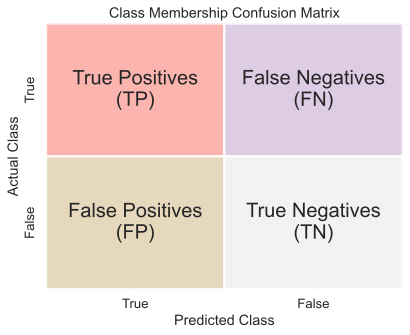

In [93]:
plot_confusion_matrix_reference()

Two of the most fundamental classification error metrics are:

**Precision:** The fraction of postive predictions you made that were correct. High precision means that if your model predicted a positive case, you believe it with high confidence. It doesn't tell us how many postive cases we missed (i.e. it doesn't tell us how sure we are about the cases we predicted were negative).

$$
\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}
$$

**Recall**: The fraction of positive cases you predicted correctly. High recall means that you are confident that you didn't miss any positive cases. *E.g., if a company had to order a recall of some product, they'd want to be sure they got to all of them, lest they get sued.*

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

The easiest way to get high precision is to call a point positive only when you are 100% sure (or reject all data points). The easiest way to get 100% recall is to predict all points to be positive, as you are guaranteed to label 100% of all positive cases. You should not optimize for either recall or precision -- you need to think about how to balance them against one another.

In [94]:
from sklearn.metrics import precision_score, recall_score

In [95]:
X = df_test[features]
y = df_test['is_curvy']

In [96]:
y_pred = lm_0.predict(X)

In [97]:
print('precision: ', round(precision_score(y, y_pred), 3))
print('recall:  ', round(recall_score(y, y_pred), 3))

precision:  0.92
recall:   0.936


#### Plotting

A few diagnostic plots for a classification model are:

- The Precision-Recall Curve
- Soft Classification Plots

All of these are based on the idea that almost all classification models are **soft classifiers**, which return a predicted probability that each observation $y_i$ is a member of some class $a$, or $P(y_i = a)$. Classifications are made when this probability is greater than a threshold $P(y_i = a) > \tau$. By default, $\tau = 0.5$, but as the threshold $\tau$ increases, recall increases and precision decreases. This is the **Precision-Recall Tradeoff**. The *ways* that these increases/decreces happen can give some insight into the strength of model predictions.

In [98]:
X = df_test[features]
y = df_test['is_curvy']

In [99]:
y_pred = lm_0.predict(X)
y_proba = lm_0.predict_proba(X)

In [100]:
y_proba[:5]

array([[0.00835592, 0.99164408],
       [0.15472926, 0.84527074],
       [0.00240609, 0.99759391],
       [0.84810645, 0.15189355],
       [0.07396888, 0.92603112]])

In [101]:
y_pred[:5].reshape(-1, 1)

array([[1],
       [1],
       [1],
       [0],
       [1]])

**Precision-Recall Curve**

Precision-Recall Curves plot the precision and recall as this threshold changes. We'l illustrate it with the logistic regression model we fit on "curvy" digits.

In [102]:
from sklearn.metrics import precision_recall_curve

In [103]:
def plot_precision_recall(y_true, y_preds):
    '''
    Plot the precision and recall curves.
    
    **For binary classification**
    
    `y_preds`: 1-d array
        probabilities for the target class
    '''
    p, r, t = precision_recall_curve(y_true, y_preds)
    
    g = sns.lineplot(x=t, y=p[:-1], label='Precision')
    g = sns.lineplot(x=t, y=r[:-1], label='Recall')
    
    # where precision = recall and FP = FN
    fp_fn = t[p[:-1] == r[:-1]][0]
    
    g.axvline(x=fp_fn, color = 'gray', ls = 'dashed', label=f'FP = FN ({round(fp_fn, 2)})')
    g.axvline(x=0.5, color = 'black', lw=0.5)
    g.set_xticks([0, 0.25, 0.5, 0.75, 1])
    g.set_xlabel("Classification Threshold")
    g.set_ylabel("Metric Value")
    g.set_title("Precision Recall Curve")
    g.legend()
    
    return g

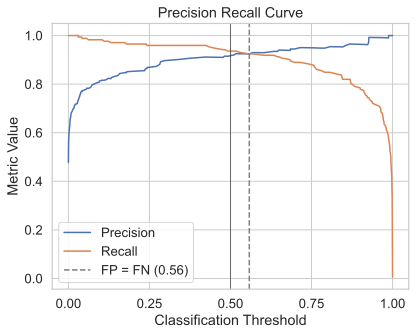

In [104]:
g = plot_precision_recall(y, y_proba[:, 1])

When the precision and recall are equal, then the False Positives matches the False Negatives.

- If $FP = FN$ when $\tau \approx 0.5$, we have a sort of "balanced difficulty" between classes.
- If $FP = FN$ when $\tau$ is small, the target class is more difficult to detect.
- If $FP = FN$ when $\tau$ is large, the negative (non-target) class is more difficult to detect.

**Soft Classification Plots**

Using the results of `predict_proba`, you can get creative with the different kinds of plots you might want to show. You can calculate average probabilities across groups of data, or analyze probabilities for particular subclasses, etc. For example, suppose we want to see how "curvy" prediction probabilities line up to the digits themselves.

In [105]:
df_plot = df_test[['digit', 'is_curvy']].copy()

In [106]:
df_plot['proba'] = y_proba[:, 1].astype(float)

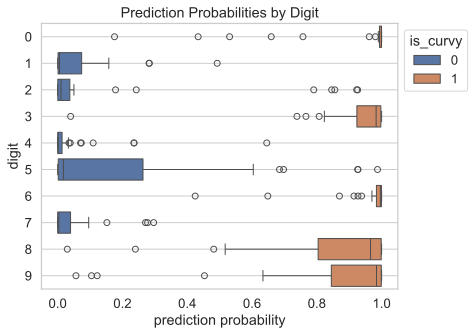

In [107]:
g = sns.boxplot(df_plot, x='proba', y='digit', orient='h', hue='is_curvy')
g.grid(visible=True, axis='y')
g.grid(visible=False, axis='x')

g.set_title("Prediction Probabilities by Digit")
g.set_xlabel("prediction probability")

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

# EXERCISES

## Exercise 1

Recall this [transaction data](https://www.kaggle.com/datasets/vipin20/transaction-data) from a previous week's pair problem. Create a "custom" train-test-split method which does the following:

1. Select the 20% "most recently added" users (by `UserId`) in the dataset, based on their earliest `TransactionTime`. So, if the earliest transaction for User $A$ was on 2/17, and the earlieast transaction for User $B$ was on 2/05, then user $B$ is more recently added. If there are approximately 4K users in the dataset, you'll have a list of about 800 users.
2. Define your "test" set as the subset of the transaction data with `UserId`s in the list you generated in step 1. The "train" set will be the rest. (This will likely not be a perfect 80/20 split ...)

*Note: Try not to look at the data too much while you do this split.*

In [35]:
import pandas as pd

df = pd.read_csv("C:\\Users\\varsh\\OneDrive\\Desktop\\Gitstuff\\Lab 10\\transaction_data.csv")

def custom_train_test_split(df, test_ratio=0.2):
    earliest_transaction_time = df.groupby('UserId')['TransactionTime'].min()
    sorted_users = earliest_transaction_time.sort_values(ascending=True)
    num_test_users = int(len(sorted_users) * test_ratio)
    test_users = sorted_users.tail(num_test_users)
    test_user_ids = test_users.index.tolist()
    test_set = df[df['UserId'].isin(test_user_ids)]
    train_set = df[~df['UserId'].isin(test_user_ids)]
    
    return train_set, test_set
train_set, test_set = custom_train_test_split(df)

print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

Train set shape: (1033362, 8)
Test set shape: (50456, 8)


## Exercise 2

1. Fit a classification model which uses `CostPerItem` and `NumberOfItemsPurchased` to predict the `Country`.
2. Evaluate your model using the metric(s) or plot(s) of your choosing. Evaluate using the test set.
3. Explain what this error means given the train-test-split method you built.

*Note: Default model parameters are okay! **The model does not need to be good.** It just needs to work. :)*

In [36]:
# your code here...
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


X_train = train_set[['CostPerItem', 'NumberOfItemsPurchased']]
y_train = train_set['Country']
X_test = test_set[['CostPerItem', 'NumberOfItemsPurchased']]
y_test = test_set['Country']

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8684398287616933


C:\Users\varsh\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


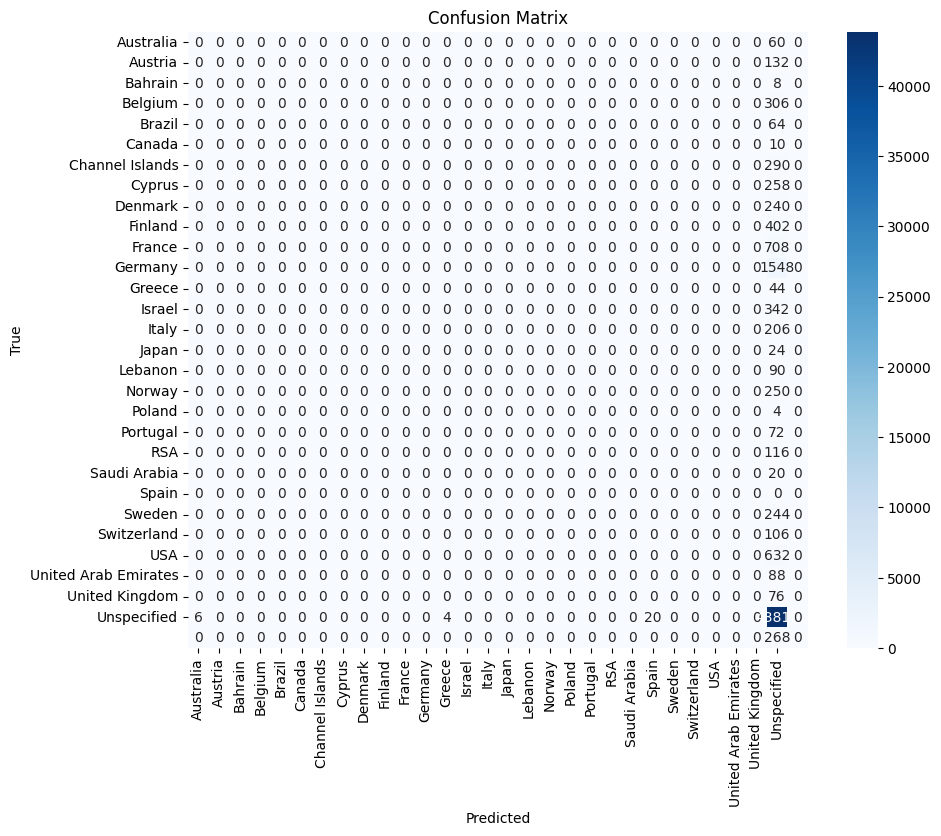

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()